In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FileName = "TOA5_50455_CO2_58_2023_259_0000"
InputPath = "FromPramod/Station3/"
InputFileExt = ".dat"
OutputPath = InputPath + "/OutFiles/"
OutputFileExt = ".csv"
OutputCleanedExt = "_Cleaned.csv"
LengthToPlot = 86400  #Max = 86400

#Read Input file and convert to csv
df = pd.read_csv(InputPath + FileName + InputFileExt)
# df = pd.read_csv("FromPramod/Station3/TOA5_50455_CO2_56_2023_257_0000.dat")
df.to_csv(OutputPath + FileName + OutputFileExt)

df2 = pd.read_csv(OutputPath + FileName + OutputFileExt,header=None)
# print(df2.head(2))

#Drop index 1,3,4 -- ie, 0,2,3
df2_drop = df2.drop([df2.index[0], df2.index[2],df2.index[3]])
# print(df2_drop.head(4))

#Assign new header as columns
new_header = df2_drop.iloc[0]
df2_drop = df2_drop[1:]
df2_drop.columns = new_header
df_new = df2_drop.reset_index(drop=True)
# print(df2_drop.head(4))
print(df_new.head(3))

#Check the length of data = 86400 ie, 24*60*60 secs in a day
if( df_new["TIMESTAMP"].count() != 86400):
    print("Length not 86400 !!!--")
    LengthToPlot = df_new["TIMESTAMP"].count()
    print("Max length of data = {}".format(LengthToPlot))
else:
    print("Length = 86400 -- Good data!")

columnsToDrop = ["RECORD","Year", "Month","Day_of_Month","Day_of_Week","Day_of_Year","Hour","Minute","Second"]
df_Clean = df_new.drop(columnsToDrop, axis=1)
# print(df_Clean.count())

df_Clean.to_csv(OutputPath + FileName + OutputCleanedExt)



#dataframes available : 
df_Clean = pd.read_csv(OutputPath + FileName + OutputCleanedExt)
print(df_Clean.head(5))
#Delte first 
df_Clean = df_Clean.loc[:,~df_Clean.columns.str.contains('^Unnamed')]
print(df_Clean.head(5))

#Plot CO2
df_WhichColumn = df_Clean["CO2"]
df_WhichColumn_Small = df_WhichColumn[:LengthToPlot]
df_WhichColumn_Small.plot()

plt.title("CO2 Plot")
plt.savefig(OutputPath + FileName + "_CO2_Plot.png")
plt.show()


/tmp/ipykernel_904677/118292911.py:13: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(InputPath + FileName + InputFileExt)
/tmp/ipykernel_904677/118292911.py:17: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(OutputPath + FileName + OutputFileExt,header=None)


1            TIMESTAMP   RECORD  Year Month Day_of_Month Day_of_Week  \
0  2023-09-16 00:00:01  4370126  2023     9           16           7   
1  2023-09-16 00:00:02  4370127  2023     9           16           7   
2  2023-09-16 00:00:03  4370128  2023     9           16           7   

1 Day_of_Year Hour Minute Second BattVolt  PTemp AirTemp     Rh SBTemp_1265  \
0         259    0      0      1    11.98  19.49   22.72  42.86       22.27   
1         259    0      0      2    11.98  19.49   22.76  42.84       22.27   
2         259    0      0      3    11.97  19.49   22.73  42.79       22.27   

1 TargTemp_1265    TmV_1265       CO2       H2O  
0         17.85  -0.2173992   564.077  14.95104  
1         17.86  -0.2164897  558.1996  14.91919  
2         17.88  -0.2156181  554.8416  14.83447  
Length = 86400 -- Good data!


   Unnamed: 0            TIMESTAMP  BattVolt  PTemp  AirTemp     Rh  \
0           0  2023-09-16 00:00:01     11.98  19.49    22.72  42.86   
1           1  2023-09-16 00:00:02     11.98  19.49    22.76  42.84   
2           2  2023-09-16 00:00:03     11.97  19.49    22.73  42.79   
3           3  2023-09-16 00:00:04     11.97  19.49    22.75  42.76   
4           4  2023-09-16 00:00:05     11.97  19.49    22.73  42.73   

   SBTemp_1265  TargTemp_1265  TmV_1265       CO2       H2O  
0        22.27          17.85 -0.217399  564.0770  14.95104  
1        22.27          17.86 -0.216490  558.1996  14.91919  
2        22.27          17.88 -0.215618  554.8416  14.83447  
3        22.27          17.88 -0.215416  551.6357  14.71146  
4        22.26          17.87 -0.216130  549.4965  14.55870  
             TIMESTAMP  BattVolt  PTemp  AirTemp     Rh  SBTemp_1265  \
0  2023-09-16 00:00:01     11.98  19.49    22.72  42.86        22.27   
1  2023-09-16 00:00:02     11.98  19.49    22.76  42.84  

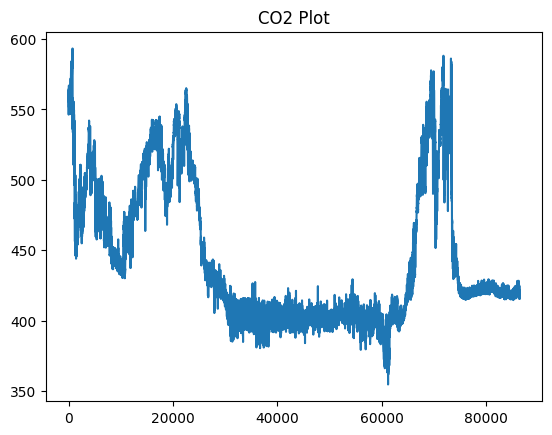

In [2]:
#Try plotting the data to get some feel first


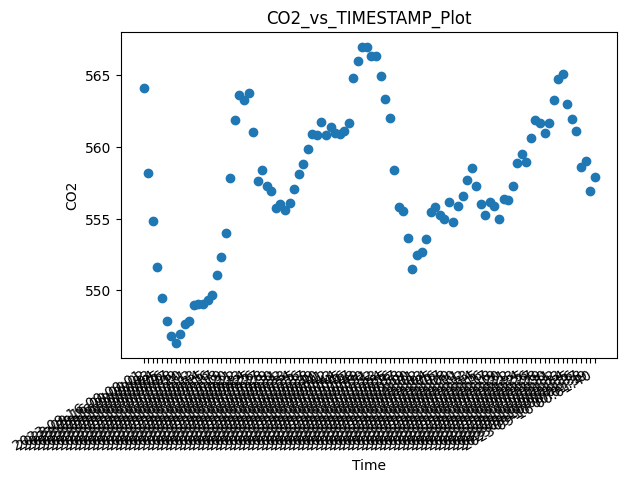

In [9]:
#Plot CO2 v/s timestamp
LengthToPlot = 100
df_WhichColumn = df_Clean["CO2"]
df_Timestamp = df_Clean["TIMESTAMP"]

df_WhichColumn_Small = df_WhichColumn[:LengthToPlot]
df_Timestamp_Small = df_Timestamp[:LengthToPlot]
# df_CO2_Small.plot()
fig,ax = plt.subplots()
plt.scatter(df_Timestamp_Small,df_WhichColumn_Small )
plt.xlabel('Time')
fig.autofmt_xdate()
plt.ylabel('CO2')
plt.title("CO2_vs_TIMESTAMP_Plot")
plt.savefig(OutputPath + FileName + "_CO2_vs_TIME_Plot.png")
plt.show()

/tmp/ipykernel_956362/2302733159.py:23: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(InputPath + FileName + InputFileExt)
/tmp/ipykernel_956362/2302733159.py:33: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(OutputPath + FileName + OutputFileExt,header=None)


Max length of data = 10000
length of X-Axis Ticks=18
             TIMESTAMP  BattVolt  PTemp  AirTemp     Rh  SBTemp_1360  \
0  2023-09-23 08:25:00      8.16  19.82    24.02  29.22        25.29   
1  2023-09-23 08:25:01      8.17  19.83    23.87  29.09        25.29   
2  2023-09-23 08:25:02      8.16  19.83    23.97  29.20        25.29   
3  2023-09-23 08:25:03      8.17  19.83    23.87  29.35        25.29   
4  2023-09-23 08:25:04      8.17  19.83    23.88  29.35        25.29   

   TargTemp_1360  TmV_1360    PAR       CO2       H2O wind_speed  \
0          21.12 -0.211780  467.6 -0.002873 -0.001006       0.48   
1          21.10 -0.212557  467.6 -0.003451 -0.000224       0.53   
2          21.11 -0.212178  467.2 -0.000569 -0.000595       0.45   
3          21.10 -0.212633  467.2 -0.003300 -0.000137       0.33   
4          21.09 -0.213226  466.7 -0.002037 -0.000748       0.31   

  wind_direction diag  IncomingSW  OutgoingSW  IncomingLW  OutgoingLW  Albedo  
0            181    0    

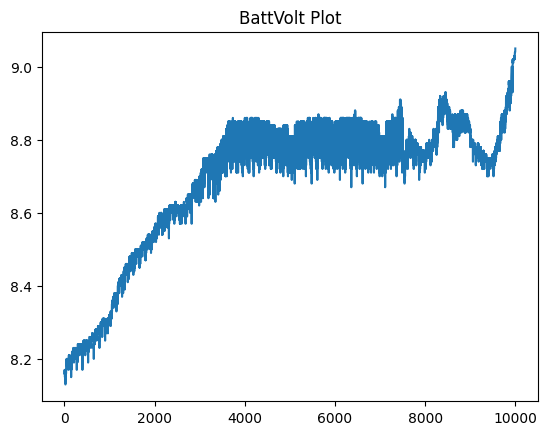

In [10]:
#Try with bad data -- 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

############Configurable Parameters#############
FileName = "TOA5_50453_CO2_78_2023_266_0825"
InputPath = "FromPramod/Staton8/bad/"  #"FromPramod/Staton8/good/TOA5_50453_CO2_44_2023_235_0000.dat"
InputFileExt = ".dat"
LengthToPlot = 86400  #Max = 86400
WhichColumnToDisplay = "BattVolt"  #"CO2"  #BattVolt 


############COnstant Parameters#############
OutputPath = InputPath + "/OutFiles/"
OutputFileExt = ".csv"
OutputCleanedExt = "_Cleaned.csv"
MaxLength = 86400


#Read Input file and convert to csv
df = pd.read_csv(InputPath + FileName + InputFileExt)
# df = pd.read_csv("FromPramod/Station3/TOA5_50455_CO2_56_2023_257_0000.dat")

#check if output path exists , if no create it
if not (os.path.exists(OutputPath)):
    os.makedirs(OutputPath)
    print("Creating New Directory- OutFiles")

df.to_csv(OutputPath + FileName + OutputFileExt)

df2 = pd.read_csv(OutputPath + FileName + OutputFileExt,header=None)
# print(df2.head(2))

#Drop index 1,3,4 -- ie, 0,2,3
df2_drop = df2.drop([df2.index[0], df2.index[2],df2.index[3]])
# print(df2_drop.head(4))

#Assign new header as columns
new_header = df2_drop.iloc[0]
df2_drop = df2_drop[1:]
df2_drop.columns = new_header
df_new = df2_drop.reset_index(drop=True)
# print(df2_drop.head(4))
# print(df_new.head(3))

#Check the length of data = 86400 ie, 24*60*60 secs in a day
LengthOfData = df_new["TIMESTAMP"].count()
if( df_new["TIMESTAMP"].count() < MaxLength):
    TotalLengthOfBadData = df_new["TIMESTAMP"].count()
    print("Max length of data = {}".format(LengthToPlot))
    if LengthToPlot > TotalLengthOfBadData :
        LengthToPlot = TotalLengthOfBadData
    
elif df_new["TIMESTAMP"].count() == MaxLength:
    print("Length = 86400 -- Good data!")
else:
    print("Length > MaxLength -- Freq>1 Hz !!!")
    exit(-1)


# columnsToDrop = ["RECORD","Year", "Month","Day_of_Month","Day_of_Week","Day_of_Year","Hour","Minute","Second"]
columnsToDrop = ["RECORD","Year", "Month","Day_of_Month","Day_of_Week","Day_of_Year","Minute","Second"]
df_Clean = df_new.drop(columnsToDrop, axis=1)
# print(df_Clean.count())

df_Clean.to_csv(OutputPath + FileName + OutputCleanedExt)



#dataframes available : 
df_Clean = pd.read_csv(OutputPath + FileName + OutputCleanedExt)
# print(df_Clean.head(5))
#Delte first 
df_Clean = df_Clean.loc[:,~df_Clean.columns.str.contains('^Unnamed')]
print(df_Clean.head(5))

#Plot CO2
df_WhichColumn = df_Clean[WhichColumnToDisplay]
df_WhichColumn_Small = df_WhichColumn[:LengthToPlot]
df_WhichColumn_Small.plot()


plt.title(WhichColumnToDisplay + " Plot")
plt.savefig(OutputPath + FileName + "_" + WhichColumnToDisplay + "_Plot.png")
plt.show()